# Weather Data Analysis

This project analyzes a weather dataset to uncover patterns in temperature, rainfall, and other conditions. The goals include:

- Simple Analysis
- Visual Analysis
- Exploring correlations between temperature, humidity, and rainfall
- Predicting rainy days using simple machine learning

In [3]:
#load data
import pandas as pd
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime

data = pd.read_csv("weather.csv")
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# Clean/Parse data

In [5]:
#Convert to DateTime type
data["Date/Time"] = pd.to_datetime(data["Date/Time"])
#Check for null values
data.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

# Simple Analysis (14 Questions)
- Q1: Find all unique wind speeds in the data
- Q2: Find the number of times when the weather is exactly clear
- Q3: Find the number of times when the wind speed is exactly 4 km/h
- Q4: Rename the column weather to weather condition
- Q5: What is the mean visibility
- Q6: What is the standard deviation of pressure
- Q7: What is the variance of relative humidity
- Q8: Find all insances when snow was recored
- Q9: Find all instance when wind speed is above 24km/h and visbility is 25
- Q10: What is the mean value of each column against each weather condition
- Q11: What is the max and min values of each column against each Weather Condition
- Q12: Show all the records where weather condition is fog
- Q13: Find all instances when weather is clear or visbility is above 40
- Q14: Find all instance when A. weather is clear and relative humidity is greater than 50 or B. Visbility is above 40

In [7]:
#code for Q1
data['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2],
      dtype=int64)

In [8]:
#code for Q2
data.groupby("Weather").get_group("Clear")

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,2012-01-03 19:00:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,2012-01-05 18:00:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,2012-01-05 19:00:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,2012-01-05 20:00:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,2012-01-05 21:00:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,2012-12-26 06:00:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,2012-12-28 10:00:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,2012-12-29 01:00:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,2012-12-29 02:00:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [9]:
#code for Q3
data[data['Wind Speed_km/h'] == 4]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,2012-01-05 00:00:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,2012-01-05 05:00:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,2012-01-07 02:00:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,2012-12-31 08:00:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,2012-12-31 09:00:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,2012-12-31 10:00:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,2012-12-31 12:00:00,-5.8,-7.5,88,4,12.9,100.78,Snow


In [10]:
#code for Q4
data.rename(columns = {"Weather" : "Weather Condition"}, inplace=True)

In [11]:
#data for Q5
data["Visibility_km"].mean()

27.664446721311478

In [12]:
#data for Q6
data.Press_kPa.std()

0.8440047459486474

In [13]:
#data for Q7
data["Rel Hum_%"].var()

286.2485501984998

In [14]:
#data for Q8
data[data["Weather Condition"].str.contains("Snow")]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
41,2012-01-02 17:00:00,-2.1,-9.5,57,22,25.0,99.66,Snow Showers
44,2012-01-02 20:00:00,-5.6,-13.4,54,24,25.0,100.07,Snow Showers
45,2012-01-02 21:00:00,-5.8,-12.8,58,26,25.0,100.15,Snow Showers
47,2012-01-02 23:00:00,-7.4,-14.1,59,17,19.3,100.27,Snow Showers
48,2012-01-03 00:00:00,-9.0,-16.0,57,28,25.0,100.35,Snow Showers
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [15]:
#data for Q9
data[(data["Wind Speed_km/h"] > 24) & (data["Visibility_km"] == 25)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
23,2012-01-01 23:00:00,5.3,2.0,79,30,25.0,99.31,Cloudy
24,2012-01-02 00:00:00,5.2,1.5,77,35,25.0,99.26,Rain Showers
25,2012-01-02 01:00:00,4.6,0.0,72,39,25.0,99.26,Cloudy
26,2012-01-02 02:00:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,2012-01-02 03:00:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8705,2012-12-28 17:00:00,-8.6,-12.0,76,26,25.0,101.34,Mainly Clear
8753,2012-12-30 17:00:00,-12.1,-15.8,74,28,25.0,101.26,Mainly Clear
8755,2012-12-30 19:00:00,-13.4,-16.5,77,26,25.0,101.47,Mainly Clear
8759,2012-12-30 23:00:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


In [16]:
#data for Q10
data.groupby("Weather Condition").mean(numeric_only=True)

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,
Clear,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


In [17]:
#code for Q11
data.groupby("Weather Condition").max()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,,
Clear,2012-12-30 20:00:00,32.8,20.4,99,33,48.3,103.63
Cloudy,2012-12-31 06:00:00,30.5,22.6,99,54,48.3,103.65
Drizzle,2012-12-22 01:00:00,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",2012-12-19 10:00:00,19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",2012-12-19 18:00:00,1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",2012-12-22 03:00:00,1.1,0.6,98,32,9.7,100.15
Fog,2012-12-29 10:00:00,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,2012-12-17 00:00:00,-2.3,-3.3,93,26,12.9,101.02


In [18]:
# additional code for Q11
data.groupby("Weather Condition").min()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather Condition,,,,,,,
Clear,2012-01-03 19:00:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,2012-01-01 17:00:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,2012-01-23 21:00:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",2012-01-23 20:00:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",2012-12-17 15:00:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",2012-12-18 21:00:00,0.3,-0.1,92,7,2.4,97.79
Fog,2012-01-01 00:00:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,2012-01-07 11:00:00,-9.0,-12.2,78,6,4.8,98.44


In [19]:
#code for Q12
data[data['Weather Condition'] == "Fog"]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,2012-12-29 04:00:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,2012-12-29 05:00:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,2012-12-29 06:00:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,2012-12-29 07:00:00,-14.8,-16.4,88,7,8.0,101.22,Fog


In [20]:
#code for Q13
data[(data['Weather Condition'] == "Clear") & (data["Visibility_km"] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
351,2012-01-15 15:00:00,-15.4,-22.8,53,24,48.3,102.71,Clear
352,2012-01-15 16:00:00,-15.1,-22.8,52,24,48.3,102.79,Clear
425,2012-01-18 17:00:00,-11.3,-18.8,54,26,48.3,101.54,Clear
440,2012-01-19 08:00:00,-13.7,-18.4,68,19,48.3,101.84,Clear
441,2012-01-19 09:00:00,-12.7,-17.2,69,17,48.3,101.73,Clear
...,...,...,...,...,...,...,...,...
8384,2012-12-15 08:00:00,-10.7,-15.6,67,13,48.3,102.69,Clear
8385,2012-12-15 09:00:00,-10.4,-15.9,64,19,48.3,102.74,Clear
8389,2012-12-15 13:00:00,-8.4,-14.7,60,19,48.3,102.64,Clear
8631,2012-12-25 15:00:00,-7.1,-13.7,59,17,48.3,101.98,Clear


In [21]:
#code for Q14
data[((data['Weather Condition'] == "Clear") & (data["Rel Hum_%"] > 50)) | (data["Visibility_km"] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Condition
106,2012-01-05 10:00:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,2012-01-05 11:00:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,2012-01-05 12:00:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,2012-01-05 13:00:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,2012-01-05 14:00:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,2012-12-30 13:00:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,2012-12-30 14:00:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,2012-12-30 15:00:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,2012-12-30 16:00:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


# Parse data for further analysis (by day)

In [23]:
data = data.set_index('Date/Time')
daily = data.resample('D').agg({'Temp_C' : 'max', 'Rel Hum_%' : 'mean', 'Wind Speed_km/h' : 'mean', 'Press_kPa' : 'mean', 'Visibility_km' : 'mean'})
daily = daily.reset_index()


In [24]:
rainy_days = data['Weather Condition'].resample('D').apply(lambda x: any(('rain' in str(val).lower()) or ('showers' in str(val).lower()) for val in x))
snowy_days = data['Weather Condition'].resample('D').apply(lambda x: any(('snow' in str(val).lower()) or ('freezing' in str(val).lower()) for val in x))
daily['hot_days'] = daily['Temp_C'] > 18
daily['rainy_days'] = rainy_days.values
daily['snowy_days'] = snowy_days.values
daily

,Date/Time,Temp_C,Rel Hum_%,Wind Speed_km/h,Press_kPa,Visibility_km,hot_days,rainy_days,snowy_days
0,2012-01-01,5.3,86.125000,12.666667,100.543750,9.862500,False,True,True
1,2012-01-02,5.2,63.083333,31.416667,99.479583,24.425000,False,True,True
2,2012-01-03,-9.0,54.791667,22.041667,101.226250,24.120833,False,True,True
3,2012-01-04,-7.6,62.875000,10.500000,101.253750,19.595833,False,False,True
4,2012-01-05,-4.1,70.000000,12.125000,100.484583,24.362500,False,False,True
...,...,...,...,...,...,...,...,...,...
361,2012-12-27,-3.7,88.833333,34.833333,100.730000,6.104167,False,False,True
362,2012-12-28,-4.2,83.083333,17.916667,101.172500,27.212500,False,False,True
363,2012-12-29,-8.5,88.666667,14.625000,100.837500,8.983333,False,True,True
364,2012-12-30,-9.1,79.791667,21.833333,100.859583,23.866667,False,False,True


# Visual Analysis

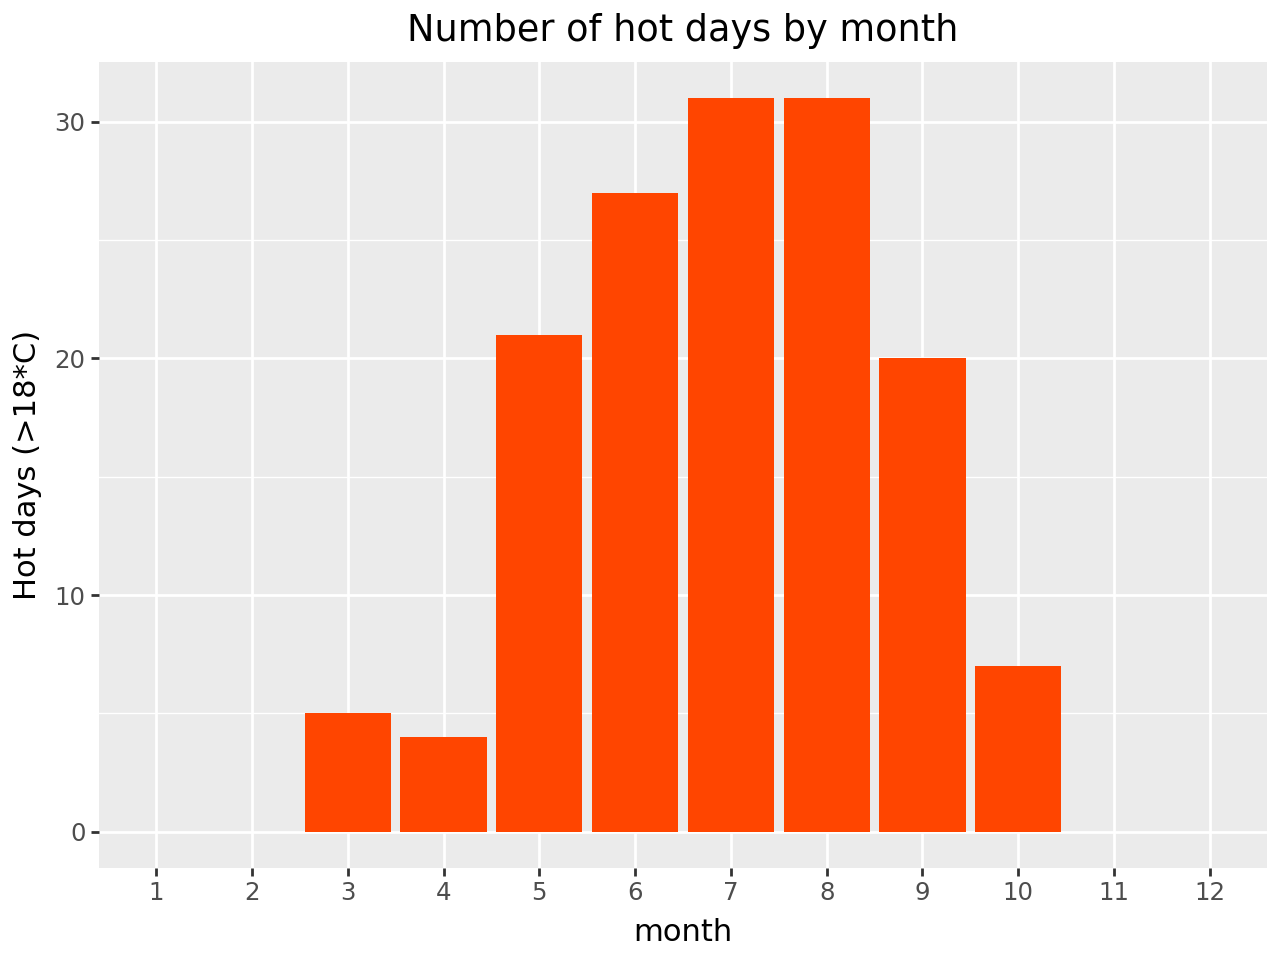

In [26]:
all_months = pd.DataFrame({'month': range(1,13)})

hot_days_by_month = daily.loc[daily['hot_days']].groupby(daily['Date/Time'].dt.month).size().reset_index(name='hot_days').rename(columns={'Date/Time': 'month'})
hot_days_by_month = all_months.merge(hot_days_by_month, on='month', how='left').fillna(0)
ggplot(hot_days_by_month, aes(x='factor(month)', y = 'hot_days')) + geom_bar(stat='identity', fill='orangered') + labs(title='Number of hot days by month', x='month', y= 'Hot days (>18*C)') + scale_x_discrete(labels=[str(i) for i in range(1, 13)])

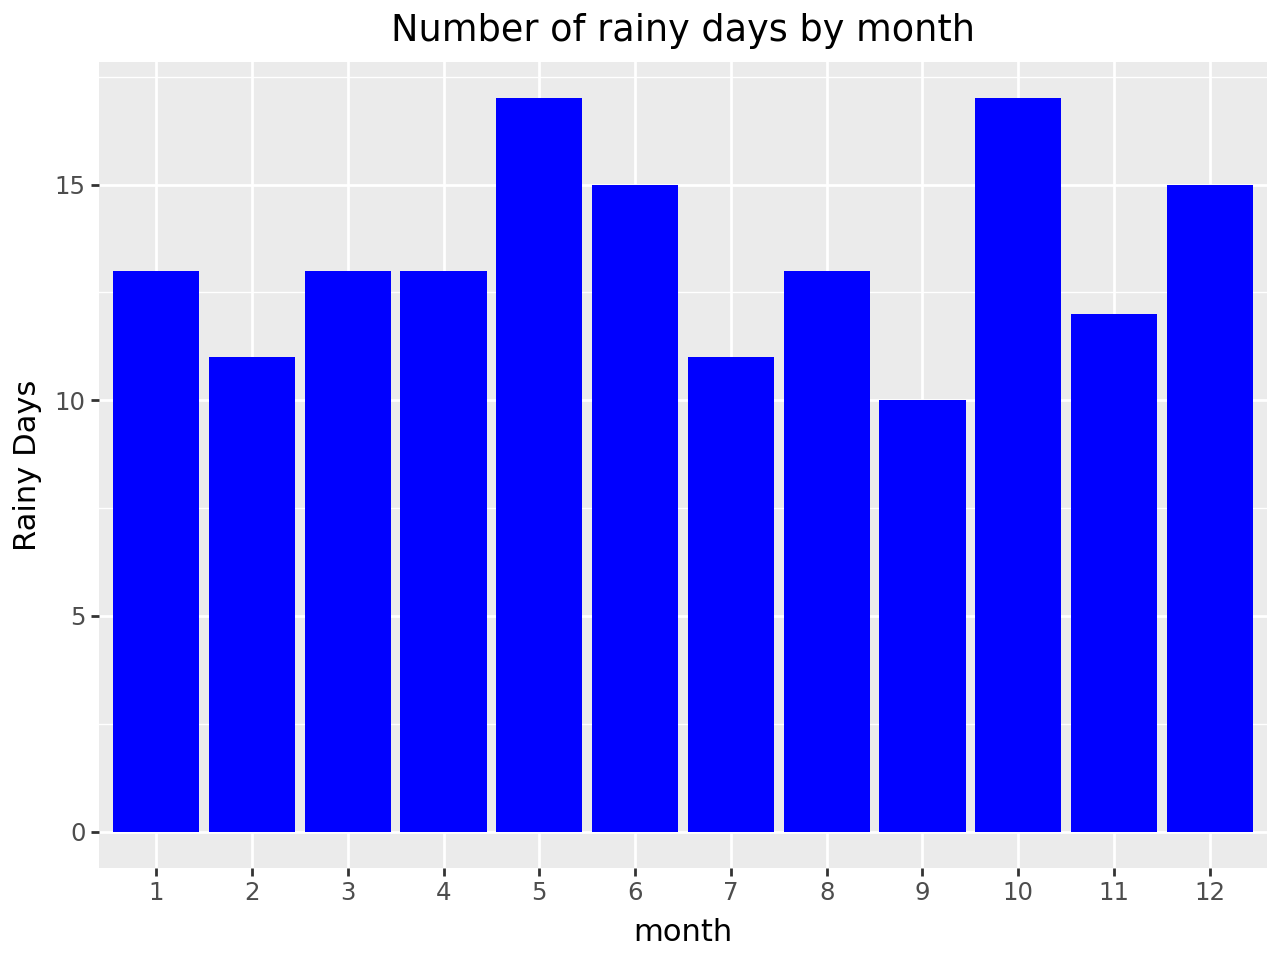

In [27]:
rainy_days_by_month = daily.loc[daily['rainy_days']].groupby(daily['Date/Time'].dt.month).size().reset_index(name='rainy_days').rename(columns={'Date/Time': 'month'})
rainy_days_by_month = all_months.merge(rainy_days_by_month, on='month', how='left').fillna(0)
ggplot(rainy_days_by_month, aes(x='factor(month)', y = 'rainy_days')) + geom_bar(stat='identity', fill='blue') + labs(title='Number of rainy days by month', x='month', y= 'Rainy Days') + scale_x_discrete(labels=[str(i) for i in range(1, 13)])

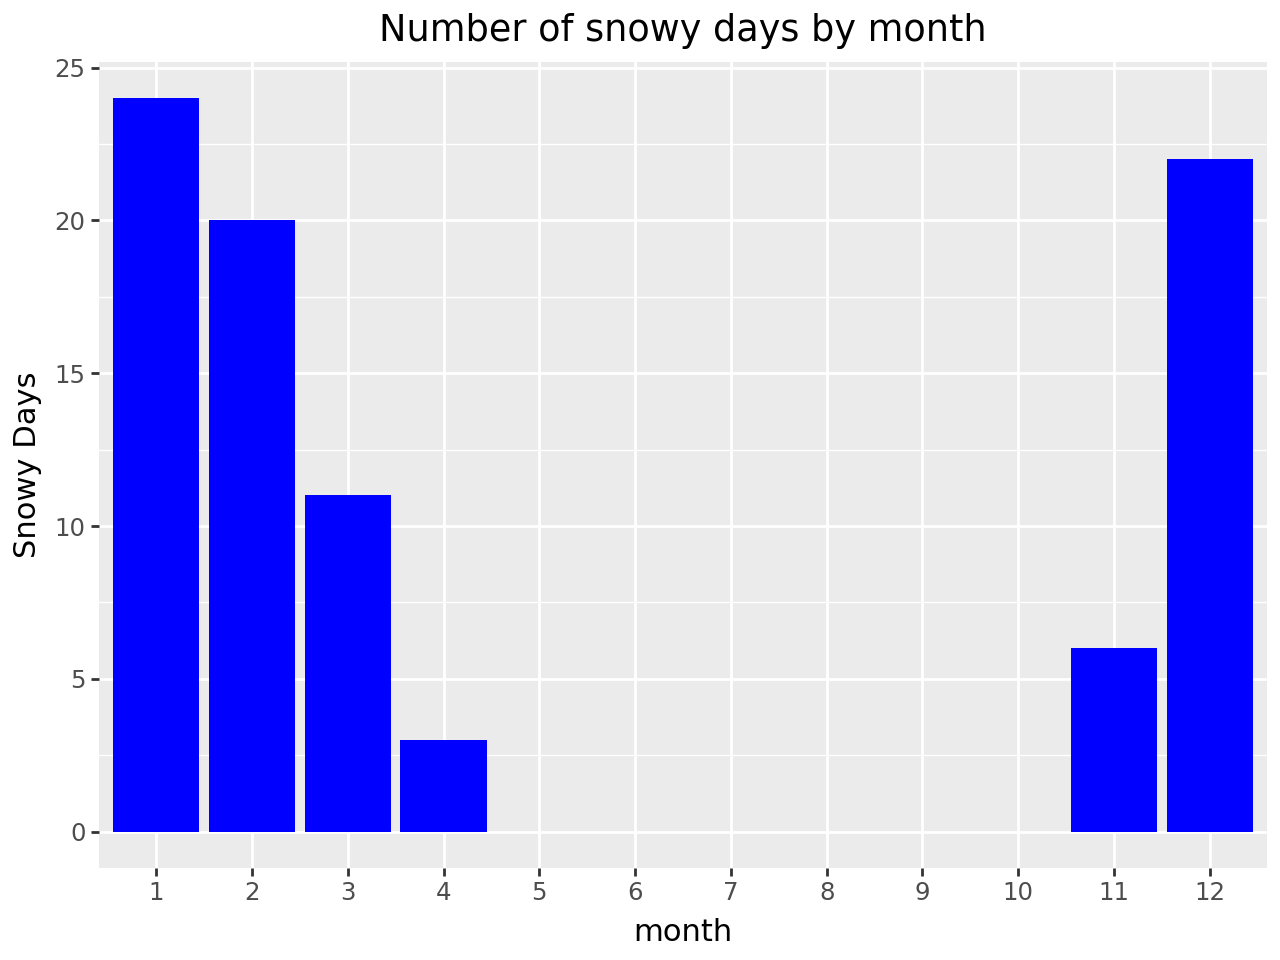

In [28]:
snowy_days_by_month = daily.loc[daily['snowy_days']].groupby(daily['Date/Time'].dt.month).size().reset_index(name='snowy_days').rename(columns={'Date/Time': 'month'})
snowy_days_by_month = all_months.merge(snowy_days_by_month, on='month', how='left').fillna(0)
ggplot(snowy_days_by_month, aes(x='factor(month)', y = 'snowy_days')) + geom_bar(stat='identity', fill='blue') + labs(title='Number of snowy days by month', x='month', y= 'Snowy Days') + scale_x_discrete(labels=[str(i) for i in range(1, 13)])

# Correlation

In [30]:
features = ['Temp_C','Rel Hum_%','Wind Speed_km/h','Press_kPa','Visibility_km']
corr_matrix = daily[features].corr()
print(corr_matrix.round(2))

                 Temp_C  Rel Hum_%  Wind Speed_km/h  Press_kPa  Visibility_km
Temp_C             1.00      -0.20            -0.20      -0.18           0.37
Rel Hum_%         -0.20       1.00             0.08      -0.29          -0.80
Wind Speed_km/h   -0.20       0.08             1.00      -0.45          -0.19
Press_kPa         -0.18      -0.29            -0.45       1.00           0.30
Visibility_km      0.37      -0.80            -0.19       0.30           1.00


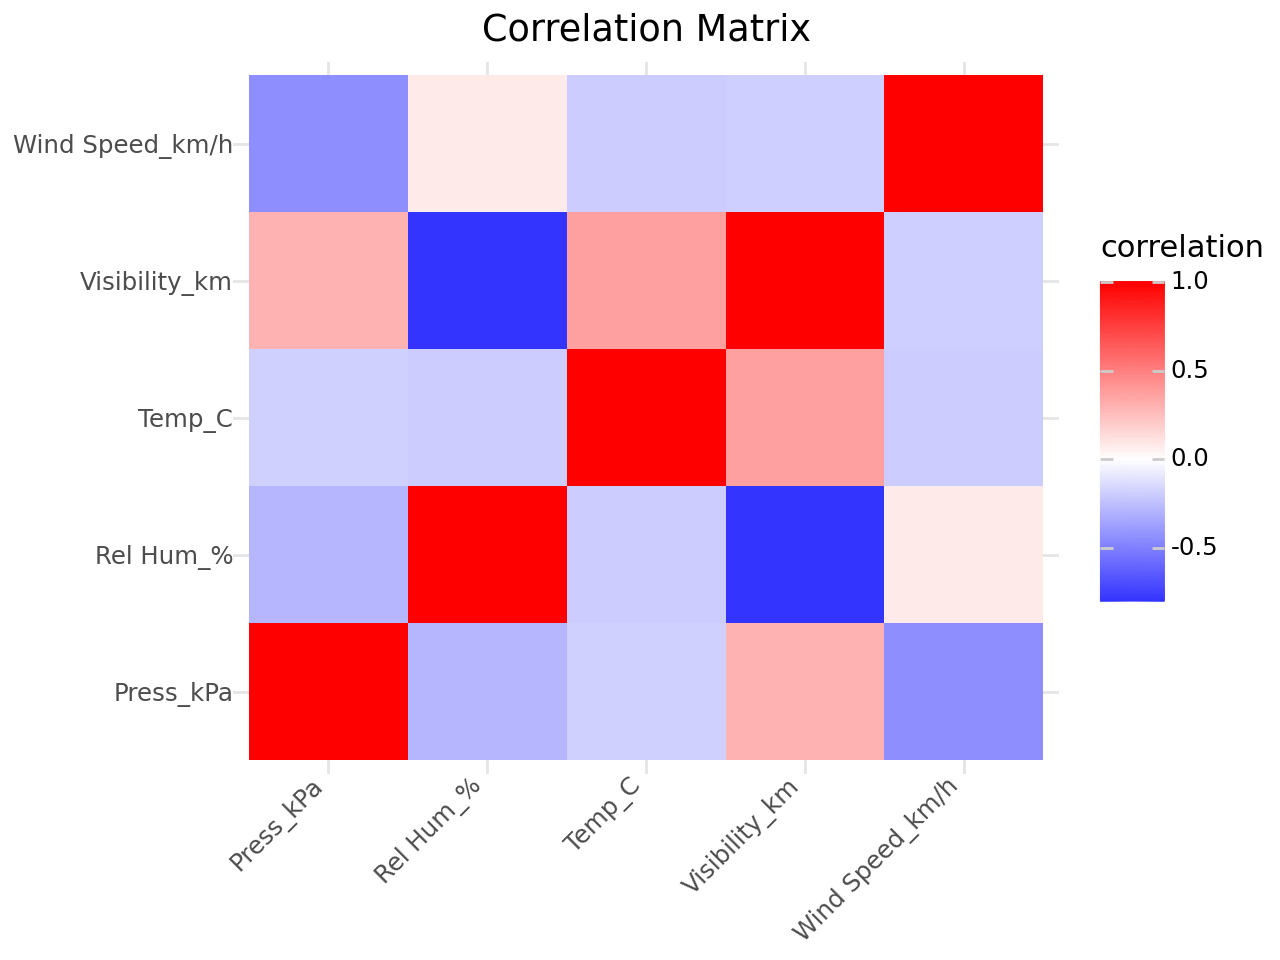

In [31]:
corr_long = (corr_matrix.reset_index().melt(id_vars='index', var_name='feature2', value_name='correlation').rename(columns={'index' : 'feature1'}))
ggplot(corr_long, aes(x='feature1', y='feature2',fill='correlation')) + geom_tile() + scale_fill_gradient2(low='blue', mid='white', high='red', midpoint = 0) + theme_minimal() + labs(title='Correlation Matrix', x='', y='') + theme(axis_text_x=element_text(rotation=45, hjust=1))

# Logistic Regression Model

In [33]:
daily = daily.sort_values('Date/Time').reset_index(drop=True)
daily['rain_tomorrow'] = daily['rainy_days'].shift(-1)
model_data = daily.dropna(subset=['rain_tomorrow','Temp_C','Press_kPa', 'Visibility_km'])
X = model_data[['Temp_C','Press_kPa', 'Visibility_km']]
X = sm.add_constant(X)
y = model_data['rain_tomorrow'].astype(int)
model = sm.Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.666921
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          rain_tomorrow   No. Observations:                  365
Model:                          Logit   Df Residuals:                      361
Method:                           MLE   Df Model:                            3
Date:                Tue, 15 Jul 2025   Pseudo R-squ.:                 0.02616
Time:                        13:54:38   Log-Likelihood:                -243.43
converged:                       True   LL-Null:                       -249.96
Covariance Type:            nonrobust   LLR p-value:                  0.004474
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            32.3086     15.334      2.107      0.035       2.255      62.363
Temp_C            0.